In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load the data
df = pd.read_stata('A1_kommune.dta')
df['const'] = 1

print(df.shape)
print(df.columns)
df.describe()

(98, 6)
Index(['nr', 'kommune', 'taxrev', 'taxrate', 'pop', 'const'], dtype='object')


,nr,taxrev,taxrate,pop,const
count,98.000000,98.000000,98.000000,98.000000,98.0
mean,462.173469,4477.341309,25.208162,56475.887755,1.0
std,236.555437,5251.175293,0.908003,62925.301713,0.0
min,101.000000,211.228409,22.799999,1969.000000,1.0
25%,242.500000,2466.702271,24.799999,29997.750000,1.0
50%,435.000000,3317.848633,25.299999,43475.000000,1.0
75%,697.250000,4786.060913,25.700001,59733.000000,1.0
max,860.000000,44170.335938,27.799999,528208.000000,1.0


               nr        taxrev    taxrate            pop  const
count   98.000000     98.000000  98.000000      98.000000   98.0
mean   462.173469   4477.341309  25.208162   56475.887755    1.0
std    236.555437   5251.175293   0.908003   62925.301713    0.0
min    101.000000    211.228409  22.799999    1969.000000    1.0
25%    242.500000   2466.702271  24.799999   29997.750000    1.0
50%    435.000000   3317.848633  25.299999   43475.000000    1.0
75%    697.250000   4786.060913  25.700001   59733.000000    1.0
max    860.000000  44170.335938  27.799999  528208.000000    1.0


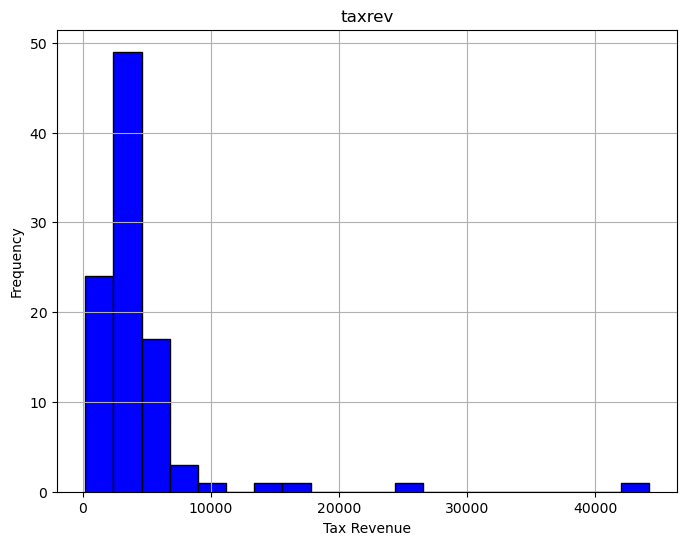

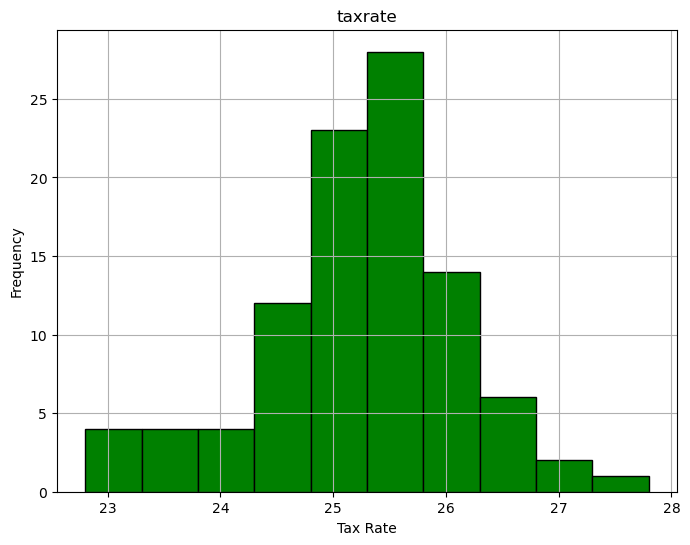

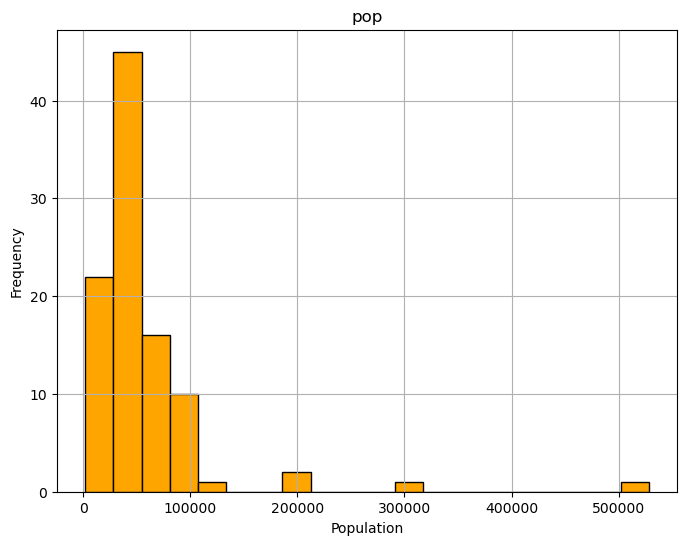

In [2]:
print(df.describe())
#Plot for 'taxrev' (Tax Revenue)
plt.figure(figsize=(8, 6))
plt.hist(df['taxrev'], bins=20, color='blue', edgecolor='black')
plt.title('taxrev')
plt.xlabel('Tax Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot for 'taxrate' (Tax Rate)
plt.figure(figsize=(8, 6))
plt.hist(df['taxrate'], bins=10, color='green', edgecolor='black')
plt.title('taxrate')
plt.xlabel('Tax Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot for 'pop' (Population)
plt.figure(figsize=(8, 6))
plt.hist(df['pop'], bins=20, color='orange', edgecolor='black')
plt.title('pop')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'taxrevm' is the dependent variable and 'taxratem' is the independent variable
# Log-transform the dependent variable 'taxrevm'
df['log_taxrev'] = np.log(df['taxrev'])

# Define the dependent (y) and independent (X) variables
X = df[['taxrate']]  # independent variable (predictor)
y = df['log_taxrev']  # dependent variable (response)

# Then we add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# You can extract the parameter estimates and their standard errors like this:
params = model.params
standard_errors = model.bse

# Create a table with parameter estimates and standard errors
results_table = pd.DataFrame({
    'Coefficient': params,
    'Standard Error': standard_errors
})

# Display the results
print(results_table)


                            OLS Regression Results                            
Dep. Variable:             log_taxrev   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.818
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0965
Time:                        11:49:47   Log-Likelihood:                -111.12
No. Observations:                  98   AIC:                             226.2
Df Residuals:                      96   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6982      2.143      5.459      0.0

In [4]:
#2.5
df['const'] = 1
y = np.log(df['taxrev'])
model_tc = sm.OLS(y, df[['taxrate','const']]).fit()
df['logpop'] = np.log(df['pop'])
model_tcl = sm.OLS(y, df[['taxrate','const','logpop']]).fit()
print(model_tcl.summary())

                            OLS Regression Results                            
Dep. Variable:                 taxrev   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2344.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.42e-81
Time:                        11:49:47   Log-Likelihood:                 79.497
No. Observations:                  98   AIC:                            -153.0
Df Residuals:                      95   BIC:                            -145.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
taxrate        0.0226      0.012      1.816      0.0

In [5]:
#3.3 a
# Ensure 'log(pop)' is computed
df['log_pop'] = np.log(df['pop'])

# Prepare the data for regression
X = sm.add_constant(df['log_pop'])  # Add constant for intercept
y = df['taxrate']

# Run the OLS regression of taxrate on log(pop) with an intercept
ols_model = sm.OLS(y, X).fit()

# Save the residuals
df['res1'] = ols_model.resid

# Print the OLS results summary
print(ols_model.summary())

# Show first few rows of the residuals for inspection
df[['taxrate', 'log_pop', 'res1']].head()

                            OLS Regression Results                            
Dep. Variable:                taxrate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.862
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0523
Time:                        11:49:47   Log-Likelihood:                -127.16
No. Observations:                  98   AIC:                             258.3
Df Residuals:                      96   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6268      1.234     22.386      0.0

,taxrate,log_pop,res1
0,23.799999,13.177245,-0.832117
1,23.100000,11.479555,-1.917942
2,25.500000,10.771680,0.321182
3,24.500000,10.428068,-0.756909
4,24.799999,9.515175,-0.664379


In [6]:
#3.3 b
# Compute log of tax revenue
df['log_taxrev'] = np.log(df['taxrev'])

# Run the OLS regression of log(taxrev) on res1
X_res1 = df['res1']  # Use residuals from the previous regression
y_log_taxrev = df['log_taxrev']

# Run the OLS regression
ols_model_res1 = sm.OLS(y_log_taxrev, X_res1).fit()

# Print the OLS results summary
print(ols_model_res1.summary())

# Show the first few rows of log(taxrev) and res1 for inspection
df[['log_taxrev', 'res1']].head()

                                 OLS Regression Results                                
Dep. Variable:             log_taxrev   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                          0.0005828
Date:                Wed, 18 Sep 2024   Prob (F-statistic):                       0.981
Time:                        11:49:47   Log-Likelihood:                         -344.53
No. Observations:                  98   AIC:                                      691.1
Df Residuals:                      97   BIC:                                      693.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,log_taxrev,res1
0,10.695808,-0.832117
1,8.807239,-1.917942
2,8.433530,0.321182
3,8.045975,-0.756909
4,6.754625,-0.664379
